In [132]:
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from owslib.wmts import WebMapTileService

from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

import numpy as np

%matplotlib inline

In [45]:
 # URL of NASA GIBS
URL = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
wmts = WebMapTileService(URL)

layers = ['BlueMarble_NextGeneration']

date_str = '2017-02-12'


In [46]:
plot_CRS = ccrs.Mercator()
geodetic_CRS = ccrs.Geodetic()

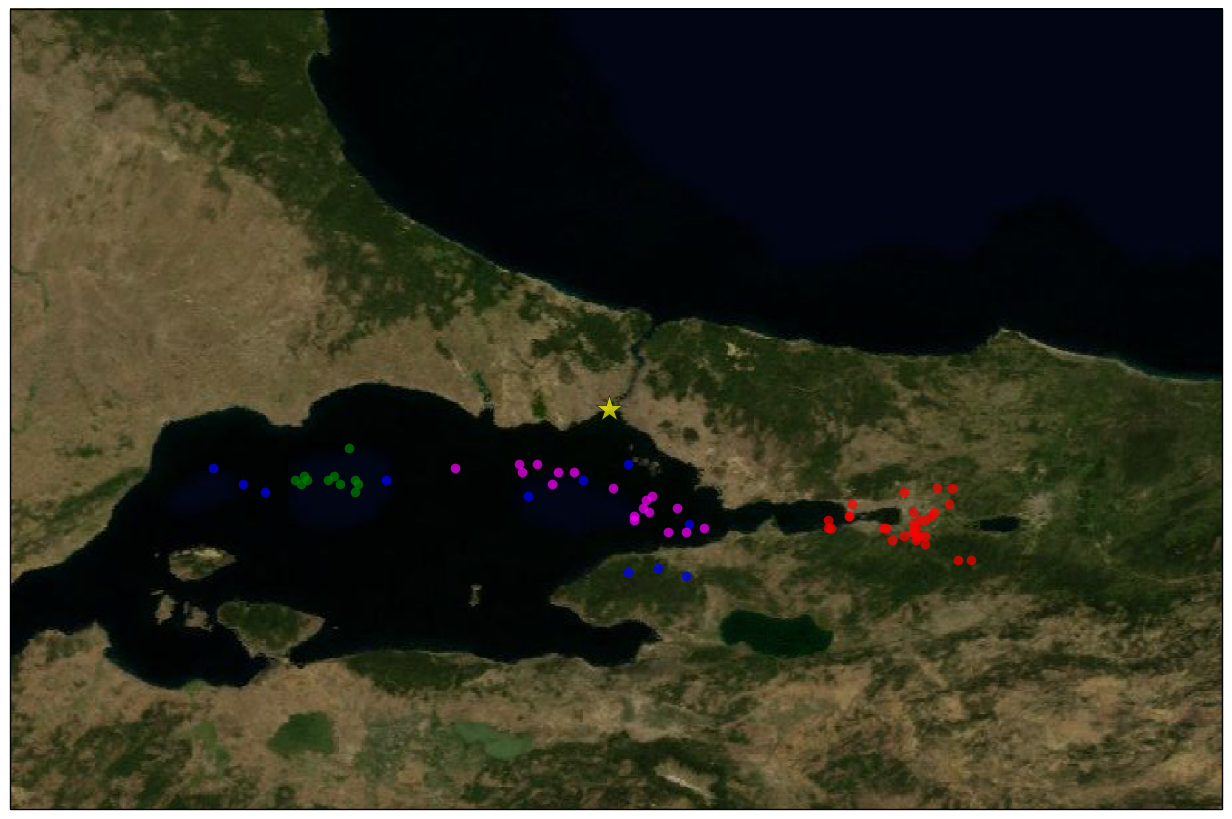

In [134]:
lat0 = 40.
lat1 = 42
lon0 = 27
lon1 = 31

x0, y0 = plot_CRS.transform_point(lon0, lat0, geodetic_CRS)
x1, y1 = plot_CRS.transform_point(lon1, lat1, geodetic_CRS)

df = pd.read_csv('NAF_FocalMechs.csv')
srcs = df.src.unique()


fig = plt.figure(figsize=(xsize, ysize), dpi=150)
ax = plt.axes([0, 0, 1, 1], projection=plot_CRS)
ax.set_xlim((x0, x1))
ax.set_ylim((y0, y1))
ax.add_wmts(wmts, layers[0], wmts_kwargs={'time': date_str})
ist_lat, ist_lon = 41.0082,28.9784
df = pd.read_csv('NAF_FocalMechs.csv')
srcs = df.src.unique()
colors = ['red', 'blue', 'green', 'magenta']

for s in range(len(srcs)):
    lons = np.array(df[df['src']==srcs[s]][['lat', 'lon']])[:, 1]
    lats = np.array(df[df['src']==srcs[s]][['lat', 'lon']])[:, 0]

    plt.plot(lons, lats, marker='o',  markeredgewidth=0.0, color= colors[s], linestyle = 'none', markersize=7, alpha=0.7, transform=ccrs.Geodetic())

# Add a marker for reference
plt.plot(home_lon, home_lat, marker='*', color='yellow', markersize=20, alpha=0.7, transform=ccrs.Geodetic())


plt.show()